# Deskripsi Proyek

Nasabah Bank Beta pergi meninggalkan perusahaan: sedikit demi sedikit, jumlah mereka berkurang setiap bulannya. Para pegawai bank menyadari bahwa lebih murah untuk mempertahankan nasabah lama mereka yang setia daripada menarik nasabah baru.
Pada kasus ini, tugas kita adalah untuk memprediksi apakah seorang nasabah akan segera meninggalkan bank atau tidak. 
Anda memiliki data terkait perilaku para klien di masa lalu dan riwayat pemutusan kontrak mereka dengan bank.
Buatlah sebuah model dengan skor F1 semaksimal mungkin. Untuk bisa dinyatakan lulus dari peninjauan, Anda memerlukan skor F1 minimal 0,59 untuk test dataset. Periksa nilai F1 untuk test set.
Selain itu, ukur metrik AUC-ROC dan bandingkan metrik tersebut dengan skor F1.
_______________
Deskripsi Data :
Data yang Anda butuhkan bisa ditemukan di file /datasets/Churn.csv. Unduh dataset.

Fitur-fitur :
1. RowNumber — indeks string data
2. CustomerId — ID pelanggan
3. Surname — nama belakang
4. CreditScore — skor kredit
5. Geography — negara domisili
6. Gender — gender
7. Age — umur
8. Tenure — jangka waktu jatuh tempo untuk deposito tetap nasabah (tahun)
9. Balance — saldo rekening
10. NumOfProducts — jumlah produk bank yang digunakan oleh nasabah
11. HasCrCard — apakah nasabah memiliki kartu kredit
12. IsActiveMember — tingkat keaktifan nasabah
13. EstimatedSalary — estimasi gaji

Target
________
1. Exited — apakah nasabah telah berhenti

## Mengunduh dan mempersiapkan datanya

# Memuat Libary yang dibutuhkan untuk pemrosesan data

In [1]:
# import pandas and numpy untuk proses dan manipulasi data
import pandas as pd
import numpy as np 
import random

# Import seaborn untuk statistika data visualisasi
import seaborn as sns

# import matplotlib untuk data visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

# import train_test_split untuk membagi data
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler 
pd.options.mode.chained_assignment = None #menghilangkan notif CopyWarning


# import modul machine learning dari library sklearn
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from catboost import CatBoostClassifier


# import sanity check untuk memeriksa fungsi terhadap model
from sklearn.metrics import *
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score,
                             balanced_accuracy_score, roc_auc_score, roc_curve)

# import sklearn utilities
from sklearn.utils import shuffle

# import warnings untuk menghapus peringatan saat dataset di manipulasi

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# Memuat Data dari csv agar dapat dijalankan dengan pandas untuk menjadi DataFrame

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

# Memuat Informasi dari dataset dan mempelajari dataset

In [3]:
print('Tabel dari dataset')
df.sample(10)

Tabel dari dataset


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4792,4793,15809991,Ferrari,756,Spain,Male,19,NaN,130274.22,1,1,1,133535.29,0
2106,2107,15659931,Ibezimako,637,Germany,Female,55,1.0,123378.20,1,1,0,81431.99,1
9776,9777,15700714,Hollis,747,France,Male,29,7.0,0.00,2,1,1,141706.43,0
311,312,15702919,Collins,729,Germany,Male,30,6.0,63669.42,1,1,0,145111.37,0
931,932,15700476,Azubuike,564,Germany,Male,41,NaN,103522.75,2,1,1,34338.21,0
486,487,15758639,Moran,641,France,Male,37,7.0,0.00,2,1,0,75248.30,0
4478,4479,15622443,Marshall,549,France,Male,31,4.0,0.00,2,0,1,25684.85,0
8479,8480,15807568,Wright,632,France,Male,50,2.0,0.00,2,0,0,57942.88,0
6269,6270,15734626,Gibson,652,Spain,Female,36,1.0,0.00,2,1,1,19302.78,0
1556,1557,15772777,Onyemachukwu,850,Spain,Female,29,10.0,0.00,2,1,1,94815.04,0


In [4]:
print('Informasi keseluruhan dari dataset :')
df.info()

Informasi keseluruhan dari dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
print('panjang baris dari dataset :')
df.shape

panjang baris dari dataset :


(10000, 14)

In [6]:
print('memeriksa nilai yang hilang / na pada dataset :')
df.isna().sum()

memeriksa nilai yang hilang / na pada dataset :


RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [7]:
print('persentase nilai yang hilang pada dataset Tenure')
tenur_null = df['Tenure'].isna().sum()
tenur_per = (df['Tenure'].isna().sum() / df.shape[0])
print('Persentase : {:.2f} %, dari nilai keseluruhan yang hilang : {}'.format(tenur_per, tenur_null))


persentase nilai yang hilang pada dataset Tenure
Persentase : 0.09 %, dari nilai keseluruhan yang hilang : 909


In [8]:
# Data yang hilang pada columns 'Tenure'
df[df['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [9]:
print('memeriksa duplikat pada dataset')
df.duplicated().sum()

memeriksa duplikat pada dataset


0

In [10]:
print('distribusi statisik tipe data numerik pada dataset')
df.describe()

distribusi statisik tipe data numerik pada dataset


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
print('distribusi statisik tipe data kategorik pada dataset')
df.describe(include='object')

distribusi statisik tipe data kategorik pada dataset


,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


# Kesimpulan 

Dari informasi keseluruhan pada dataset, kita memiliki 10000 rows dengan 14 columns. dapat kita lihat terdapat 9% data yang hilang pada column "Tenure" dengan value yang hilang secara random / missing at random (MAR). lalu untuk menangani nilai yang hilang kita dapat drop value yang hilang atau mengisinya dengan median, serta kita akan mengubah tipe data dari float ke interger pada columns "Tenure", "Balance" dan "EstimatedSalary.


# Mempersiapkan Data

# Menangani nilai yang hilang pada column 'Tenure'

Utuk menangani nilai yang hilang pada column 'Tenure', pertama kita akan mendapatkan nilai yang unik berdasarkan column 'Surename', lalu kita akan memilih nilai acak dari list 'surename' lalu mendrop nilai yang hilang pada column tenure lalu mengisi nilai yang hilang dengan median dari columns tenure.

In [12]:
# menangani nilai yang yang hilang pada column "Tenure"
# mendapatkan nilai unique dari nama 
#for surname in df['Surname'].unique().tolist():
    # mendaptkan nama spesifik untuk nilai 'Tenure'
   # specific_surname_df = df[df['Surname'] == surname].dropna()['Tenure']
   # surname_tenure_list = specific_surname_df.unique().tolist()
    # filter nilai yang hilang untuk mendapatkan nilai acak pada 'Tenure' berdasarkan surename. dan mengisi nilai yang hilang dengan medi
   # if surname_tenure_list != []:
       # df.loc[(df['Surname'] == surname) & (df['Tenure'] != df['Tenure']), 'Tenure'] = random.choice(surname_tenure_list)
    #else:
       # df.loc[(df['Surname'] == surname) & (df['Tenure'] != df['Tenure']), 'Tenure'] = df['Tenure'].median()

In [13]:
# menangani nilai yang yang hilang pada column "Tenure" dengan mengisi nilai yang hilang dengan median
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

Kita telah berhasil mengisi nilai yang hilang pada column Tenure berdasarkan nilai mediannya, mari kita lihat distribusi statistik pada dataframe.

In [14]:
# melihat distribusi statistik setelah mengisi nilai yang hilang 
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:
print('memeriksa nilai yang hilang / na pada dataset :')
df.isna().sum()

memeriksa nilai yang hilang / na pada dataset :


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
# mengubah tipedata ke tipedata yang tepat
def convert_to_type(df, cols, type_val):
    for col in cols:
        df[col] = df[col].astype(type_val)
        
convert_to_type(df, ['Surname', 'Geography', 'Gender'], str)
convert_to_type(df, ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'], 'int64')
convert_to_type(df, ['Balance', 'EstimatedSalary'], float)

In [17]:
print('Informasi keseluruhan dari dataset :')
df.info()

Informasi keseluruhan dari dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Sekarang kita tidak mempunyai nilai yang hilang dan kita telah mengganti tipedata pada dataset. mengganti nilai yang hilang sepertinya opsi yang baik dari pada kita mengahapus columns yang terdapat nilai yang hilang. data telah di cleansing sekarang kita siap untuk mempersiapkan kelas-kelas feature, target dan melatih model.

## Memeriksa kesimbangan kelas-kelas yang ada dan melatih model tanpa mempertimbangkan ketidakseimbangan. 

# Mempersiapkan variabel feature & target

Pada tahap ini kita akan menentukan kelas-kelas feature dan menggunakan one-hot encoding untuk tipedata kategorikal. one-hot encoding berguna untuk mengubah tipedata kategorikan menjadi numerik. langkah pertama kita harus membuat variabel dummy dan mengaplikasikannya ke one-hot encoding untuk variable feature kategorikal. sebelumnya kita akan menghapus variabel yang tidak penting untuk digunakan pada variabel feature seperti CustomerId, RowNumber dan Surname. lalu kita kan melatih model tanpa mempertimbangkan ketidakseimbangan pada data.

In [18]:
# menghapus variable yang tidak penting untuk digunakan sebagai features
df = df.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
# one-hot encoding untuk kategorical feature
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [20]:
# menentukan variabel untuk kelas features dan target
features = df_ohe.drop(['Exited'], axis=1)
target   = df_ohe['Exited'] 

In [21]:
# membagi data kedalam traning dan testing 
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.20, random_state=12345)

# membagi data kedalam validation dan training
features_train, features_valid, target_train, target_valid,  = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345)# 0.25 * 0.80 = 0.20 for validation

# melihat panjang baris data yang telah di pisah
print('panjang baris features_train  {} ' .format(features_train.shape[0]) + 'persentase dataset sebesar 60% data')
print('panjang baris features_valid  {} ' .format(features_valid.shape[0]) + 'persentase dataset sebesar 20% data')
print('panjang baris features_test   {} ' .format(features_test.shape[0]) + 'persentase dataset sebesar 20% data')

panjang baris features_train  6000 persentase dataset sebesar 60% data
panjang baris features_valid  2000 persentase dataset sebesar 20% data
panjang baris features_test   2000 persentase dataset sebesar 20% data


In [22]:
# menentukan numerik features pada dataset 
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
           'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [23]:
# menstandarkan data numerik dengan features scaling 
scaler = StandardScaler()
scaler.fit(features_train[numeric])

# mengubah train set dan test set menggunggunakan transform()
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric]  = scaler.transform(features_test[numeric])

print('Panjang baris dari dataset features dan target')
print('-'*30)
print('Train features :',features_train.shape)
print('Train target   :',target_train.shape)
print('Valid features :',features_valid.shape)
print('Valid target   :',target_valid.shape)
print('Test features  :',features_test.shape)
print('Test target    :',target_test.shape)
display(features_train.head())

Panjang baris dari dataset features dan target
------------------------------
Train features : (6000, 11)
Train target   : (6000,)
Valid features : (2000, 11)
Valid target   : (2000,)
Test features  : (2000, 11)
Test target    : (2000,)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
492,-0.134048,-0.078068,-0.369113,0.076163,0.816929,-1.550255,0.968496,0.331571,0,0,0
6655,-1.010798,0.494555,-0.007415,0.136391,-0.896909,0.645055,0.968496,-0.727858,0,0,1
4287,0.639554,1.353490,-1.454209,0.358435,-0.896909,0.645055,0.968496,-0.477006,1,0,1
42,-0.990168,2.116987,-1.092511,0.651725,-0.896909,0.645055,0.968496,-0.100232,0,0,0
8178,0.567351,0.685430,0.715982,0.813110,0.816929,0.645055,0.968496,0.801922,0,0,0


Persentase kelas pada variabel target


0    7963
1    2037
Name: Exited, dtype: int64

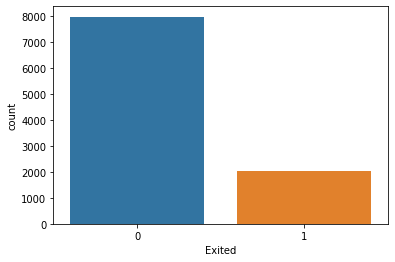

In [24]:
# Barplot dari variabel target 
sns.countplot(target);
print('Persentase kelas pada variabel target')
display(target.value_counts())

Dapat kita lihat pada ketidakseimbangan pada kelas/variabel target

Kesimpulan : 

setelah berhasil menghapus variabel yang tidak penting pada variabel features dan menentukan variabel features, lalu kita menggunakan libarry dummy untuk mengubah variabel dengan tipedata kategorik ke numerik dengan fungsi one-hot encoding dengan hasil kita menambhkan kolum dimana variabel "geography dibagi ke dalam 2 bagian yakni : geography_german dan geography_spain dan column gender menjadi gender_male dengan nilainya dapat dengan mudah disimpulkan dari salah satu dari dua kolom lainnya (memiliki 1 di mana dua kolom lainnya memiliki nol, dan memiliki nol di tempat lain), dengan fitur ini kita tidak akan jatuh kedalam dummy trap. lalu kita telah melakukan penskalaan fitur dimana kita menghindari dimana alogaritma akan mendeteksi nilai yang lebih besar pada suatu variabel dan variabel itu dianggap lebih penting dibandingkan dengan variable yang memiliki besaran nilai yang lebih kecil. maka dari itu kita menggunakan  scaling features untuk menstandarkan data agar semua fetures dianggap penting pada saat pengeksekusian alogaritma,  sehingga rata-ratanya menjadi 0 dan variansnya menjadi 1. lalu kita membagi ukuran features train 70% dimana terdapat 7000 baris dan 11 column, features target 30% dimana terdapat 3000 baris dan 11 kolom, sekarang kita dapat melatih model dengan tidak mempertimbangkan kelas-kelad pada variabel target.


# Fungsi untuk memplot ROC Curve & precision-recall curve

In [25]:
# fungsi untuk plot ROC curve
def plot_roc(y_test, preds, ax=None, label='model'):
    with plt.style.context('seaborn-whitegrid'):
        if not ax: fig, ax = plt.subplots(1, 1)
        fpr, tpr, thresholds = roc_curve(y_test, preds)
        ax.plot([0, 1], [0, 1],'r--')
        ax.plot(fpr, tpr, lw=2, label=label)
        ax.legend(loc='lower right')
        ax.set_title(
            'ROC curve\n'
            f""" AP: {average_precision_score(
                y_test, preds, pos_label=1
            ):.2} | """
            f'AUC: {auc(fpr, tpr):.2}'
        )
        ax.set_xlabel('False Positive Rate (FPR)')
        ax.set_ylabel('True Positive Rate (TPR)')
        ax.annotate(f'AUC: {auc(fpr, tpr):.2}', xy=(.43, .025))
        ax.legend()
        ax.grid()
        return ax
    
# fungsi untuk plot precision-recall curve
def plot_pr(y_test, preds, ax=None, label='model'):
    with plt.style.context('seaborn-whitegrid'):
        precision, recall, thresholds = precision_recall_curve(y_test, preds)
        if not ax: fig, ax = plt.subplots()
        ax.plot([0, 1], [1, 0],'r--')    
        ax.plot(recall, precision, lw=2, label=label)
        ax.legend()
        ax.set_title(
            'Precision-recall curve\n'
            f""" Average Precision Score : {average_precision_score(
                y_test, preds, pos_label=1
            ):.2} | """
            f'AUC: {auc(recall, precision):.2}'
        )
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_xlim(-0.05, 1.05)
        ax.set_ylim(-0.05, 1.05)
        ax.legend()
        ax.grid()
        return ax

# Fungsi untuk menghitung precision, recal dan F1 Score

In [26]:
# Fungsi untuk menghitung precision, recal dan F1 Score
def print_model_evaluation(y_test, test_predictions):
    print("\033[1m" + 'F1 score: ' + "\033[0m", '{:.3f}'.format(f1_score(y_test, test_predictions)))
    print("\033[1m" + 'Accuracy Score: ' + "\033[0m", '{:.2%}'.format(accuracy_score(y_test, test_predictions)))
    print("\033[1m" + 'Precision: ' + "\033[0m", '{:.3f}'.format(precision_score(y_test, test_predictions)))
    print("\033[1m" + 'Recall: ' + "\033[0m", '{:.3f}'.format(recall_score(y_test, test_predictions)))
    print("\033[1m" + 'Balanced Accuracy Score: ' + "\033[0m", '{:.2%}'.format(balanced_accuracy_score(y_test, test_predictions)))
    print("\033[1m" + 'Receiver Operating Characteristic(ROC) Area Under Curve (AUC) Score: ' + "\033[0m", '{:.2%}'.format(roc_auc_score(y_test, test_predictions)))
    print()
    print("\033[1m" + 'Confusion Matrix' + "\033[0m")
    print('-'*50)
    print(confusion_matrix(y_test, test_predictions))
    print()
    print("\033[1m" + 'Classification report' + "\033[0m")
    print('-'*50)
    display(pd.DataFrame(classification_report(target_test, test_predictions, output_dict=True)).T)
    print()
    

# Melatih model tanpa mempertimbangkan ketidakseimbangan kelasnya

# Baseline Model 

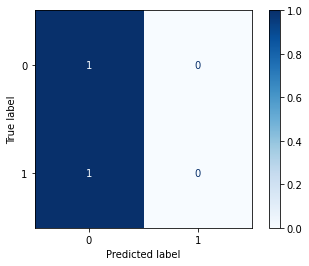

In [27]:
# Baseline model menggunakan dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, target_train)
dummy_clf_valid_predictions = dummy_clf.predict(target_valid)
plot_confusion_matrix(estimator=dummy_clf, X=features_valid, y_true=target_valid,
                      normalize='true', cmap='Blues');

Persentase kelas pada variabel target_valid


0    1609
1     391
Name: Exited, dtype: int64

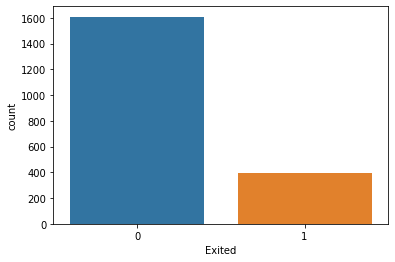

In [28]:
# Barplot dari variabel target 
sns.countplot(target_valid);
print('Persentase kelas pada variabel target_valid')
display(target_valid.value_counts())

In [29]:
print_model_evaluation(target_valid, dummy_clf_valid_predictions)

F1 score:  0.000
Accuracy Score:  80.45%
Precision:  0.000
Recall:  0.000
Balanced Accuracy Score:  50.00%
Receiver Operating Characteristic(ROC) Area Under Curve (AUC) Score:  50.00%

Confusion Matrix
--------------------------------------------------
[[1609    0]
 [ 391    0]]

Classification report
--------------------------------------------------


,precision,recall,f1-score,support
0,0.786500,1.0000,0.880493,1573.0000
1,0.000000,0.0000,0.000000,427.0000
accuracy,0.786500,0.7865,0.786500,0.7865
macro avg,0.393250,0.5000,0.440246,2000.0000
weighted avg,0.618582,0.7865,0.692507,2000.0000


Dengan menggunakan prediksi model dummy tanpa memperhitungkan ketidakseimbangannya, dapat kita lihat bahwa accuracy score nya tinggi yakni 80.45%% dengan skor F1 test setnya adalah 0,0 sedangkan skor F1 minimal 0,59 untukt test set. ini menunjukkan bahwa akurasi yang tinggi bukanlah ukuran yang baik untuk mengevaluasi kinerja model. 

# Logistic Regression

In [30]:
# Membuat Fungsi untuk model logistic regression model 
def logistic_regression(X_train, y_train, X_valid, y_valid):
    model = LogisticRegression(random_state=12345, solver='liblinear')
    model.fit(X_train, y_train) # melatih model
    train_predictions = model.predict(X_train) # prediksi score dari training dataset
    valid_predictions = model.predict(X_valid) # prediksi score dari validation dataset

    # metric evaluasi dari model LogisticRegression
    print_model_evaluation(y_valid, valid_predictions)
    

# Sanity Check

0    0.928
1    0.072
dtype: float64


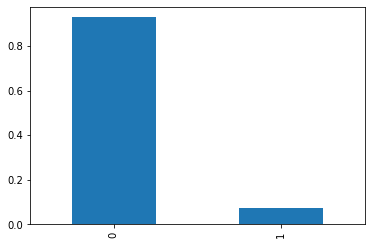

In [31]:
# sanity check
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train) # train the model 
test_predictions = pd.Series(model.predict(features_test))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

Pada bagian ini, kita melatih model tanpa memperhitungkan ketidakseimbangan kelasnya. Kita mencapai skor F1 0,297. lalu melakukan sanity check dengan memeriksa seberapa sering kelas target berisi kelas "1" atau "0". Kita dapat mengamati ketidakseimbangan kelas pada features test yang diprediksi. Selanjutnya kita akan mencoba meningkatkan kualitas model menggunakan dua pendekatan berbeda untuk memperbaiki ketidakseimbangan kelas.

## Meningkatkan Kualitas Model 

Pada Tahap ini kita akan menggunakan dua pendekatan untuk memperbaiki ketidakseimbangan pada kelas yakni :

1. Class Weight Adjusment / Penyeimbangan Kelas
2. Upsampling

# Penyeimbangan Kelas

In [32]:
# class weight adjustment
model = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
model.fit(features_train, target_train)
train_predictions = model.predict(features_train)
valid_predictions = model.predict(features_valid)
print('F1 score dengan menggunakan Class Weight Adjustment pada train_set : {:.3f}'.format(f1_score(target_train, train_predictions)))
print('F1 score dengan menggunakan Class Weight Adjustment pada valid_set : {:.3f}'.format(f1_score(target_valid, valid_predictions)))

F1 score dengan menggunakan Class Weight Adjustment pada train_set : 0.495
F1 score dengan menggunakan Class Weight Adjustment pada valid_set : 0.475


0    0.6175
1    0.3825
dtype: float64


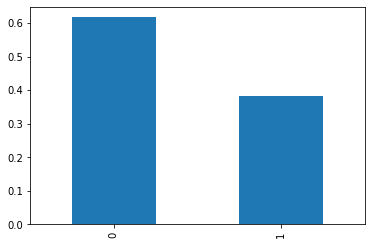

In [33]:
# sanity check setelah dilakukan penyeimbangan kelas
test_predictions = pd.Series(model.predict(features_test))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

pada tahap ini kita telah menyeimbangkan kelas dengan menggunakan fungsi class_weight='balance'. dapat dilihat Score F1 nya meningkat menjadi 0.492 untuk kelas yang seimbang.

# Upsampling

In [34]:
# fungsi untuk upsampling 
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    return features_upsampled, target_upsampled

# membuat training set yang baru 
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 5
)

In [35]:
# F1 score setelah dilakukan upsampling 
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
train_predictions = model.predict(features_train)
valid_predictions = model.predict(features_valid)
print('F1 score setelah dilakukan upsampling: {:.3f}'.format(f1_score(target_train, train_predictions)) + ' pada train_set')
print('F1 score setelah dilakukan upsampling: {:.3f}'.format(f1_score(target_valid, valid_predictions)) + ' pada valid_set')

F1 score setelah dilakukan upsampling: 0.480 pada train_set
F1 score setelah dilakukan upsampling: 0.470 pada valid_set


0    0.5315
1    0.4685
dtype: float64


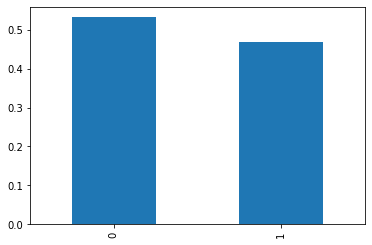

In [36]:
# sanity check setelah dilakukan upsampling
test_predictions = pd.Series(model.predict(features_test))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

Pada tahap ini, pertama kita membagi sampel training set ke negatif dan positif, lalu kita menduplikat pengamatan positif dan menggabungkannya dengan kelas negatif. lalu kita mengacak data menggunakan fungsi shuffle()  dan melatih model dengan menggunakan LogisticRegression model dengan data yang baru. setelah itu kita menghitung score F1 setelah melakukan upsampling dengan score 0.484, terdapat peningkatan dari sebelumnya dimana skor F1 sebelum mempertimbangkan keseimbangan kelas yakni 0.300. 

# Memilih Parameter Terbaik



Pada tahap ini dengan meggunakan training set, kita akan memilih parameter terbaik dari beberapa model untuk dibandingkan, model mana yang paling terbaik untuk prediksi kita.

# Decision Tree Classifier

In [37]:
# optimasisasi hyperparameter untuk model Decision tree classifier
parameters = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [2, 4, 8, 16],
    "min_samples_split" : [2, 4, 8, 16],
    "min_samples_leaf" : [2, 4, 6]
    }
classifier = DecisionTreeClassifier()
grid = GridSearchCV(classifier, parameters, scoring='f1', cv=5)
grid.fit(features_train, target_train) 
y_pred = grid.predict(features_valid)
print('Kombinasi parameter yang memberikan kita skor F1 : ')
print(grid.best_params_)
print('Accuracy terbaik setelah menentukan parameter terbaik : {:.3f}'.format(grid.best_score_))
print('Accuracy dari model terbaik pada training dataset : {:.3f}'.format(grid.score(features_train, target_train)))
print('F1 score: ', f1_score(target_valid, y_pred))

Kombinasi parameter yang memberikan kita skor F1 : 
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 16}
Accuracy terbaik setelah menentukan parameter terbaik : 0.576
Accuracy dari model terbaik pada training dataset : 0.664
F1 score:  0.5435114503816795


In [38]:
# membuat fungsi decision tree classifier
def decision_tree_classifier(X_train, y_train, X_valid, y_valid):
    
    # membuat list untuk mendapatkan nilai
    train_scores = []
    valid_scores = []
    f1_scores = []
    
    # Melatih Model
    model = DecisionTreeClassifier(**grid.best_params_) 
    model.fit(X_train, y_train) # melatih model
   
    # membuat prediksi dari train set
    train_predictions = model.predict(X_train)
    train_predictions_acc = accuracy_score(y_train, train_predictions)
    train_scores.append(train_predictions_acc)
    
    # membuat prediksi dari valid set
    dt_valid_predictions = model.predict(X_valid) 
    dt_valid_predictions_acc = accuracy_score(y_valid, dt_valid_predictions)
    valid_scores.append(dt_valid_predictions_acc)
    f1_score_ = f1_score(y_valid, dt_valid_predictions)
    f1_scores.append(f1_score_)
    scores = list(zip(f1_scores, train_scores, valid_scores))
    print('Pengklasifikasian terbaik dari model  Decission tree classification dengan ' "\033[1m" + 'F1 score {:.3f}'.format(max(scores, key = lambda x: x[0])[0]) + "\033[0m" +   
          ' dan score accuracy ' "\033[1m" '{:.2%}'.format(max(scores, key = lambda x: x[0])[1]) + ' untuk training set' + "\033[0m" + 
          ' dan ' + "\033[1m" '{:.2%}'.format(max(scores, key = lambda x: x[0])[2]) + ' untuk valid set' + "\033[0m")
    print()
    
    # metric evaluasi dari model DecisionTreeClassifier
    print_model_evaluation(target_valid, dt_valid_predictions)
    


In [39]:
# Menjalankan fungsi dari model decision tree classifier
decision_tree_classifier(features_train, target_train, features_valid, target_valid)

Pengklasifikasian terbaik dari model  Decission tree classification dengan F1 score 0.544 dan score accuracy 88.53% untuk training set dan 85.05% untuk valid set

F1 score:  0.544
Accuracy Score:  85.05%
Precision:  0.674
Recall:  0.455
Balanced Accuracy Score:  70.09%
Receiver Operating Characteristic(ROC) Area Under Curve (AUC) Score:  70.09%

Confusion Matrix
--------------------------------------------------
[[1523   86]
 [ 213  178]]

Classification report
--------------------------------------------------


,precision,recall,f1-score,support
0,0.783410,0.864590,0.822001,1573.0000
1,0.193182,0.119438,0.147612,427.0000
accuracy,0.705500,0.705500,0.705500,0.7055
macro avg,0.488296,0.492014,0.484806,2000.0000
weighted avg,0.657396,0.705500,0.678019,2000.0000


Pada tahap ini dengan menggunakan library GridSearchCV untuk melakukan optimasi pada hyperparameter pada paramter max_depth, criteria, min_sample_split, dan min_sample_leaf. kita menentukan parameter terbaik dari model decision tree classifier. dimana pada kedalaman/depth yang dangkal dari model pada umumnya tidak overfit tetapi memiliki kinerja yang buruk (bias yang tinggi dan varian yang rendah), dan depth yang dalam pada umumnya overfit dan memiliki kinerja yang baik (bias yang rendah dan varian yang tinggi), sehingga kedalam/depth yang kita inginkan adalah yang tidak terlalu dangkan sehingga memiliki kinerja rendah dan tidak terlalu dalam sehingga membuat overfit pada training dataset. kita perlu memiliki keseimbangan antara bias dan variannya. dimana pada kedalaman/ max_depth = 8 kita mendapatkan F1 score 0.548, dengan score accuracy 87.94% untuk  training set dan 84.57% untuk testing set.

# Logistic Regression Model

In [40]:
# optimasi parameter model Logistic Regression 
# menentukan parameters
grid = {
    "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
    "penalty" : ['l2'],
    "C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# menentukan grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# melatih model
regressor = LogisticRegression()
grid_search = GridSearchCV(estimator = regressor, param_grid = grid,  n_jobs=-1, cv=cv, scoring='f1', error_score=0)
grid_search.fit(features_train, target_train) 
y_pred = grid_search.predict(features_valid)
print('Kombinasi parameter yang memberikan kita skor F1 terbaik : ')
print(grid_search.best_params_)
print('Accuracy terbaik setelah menentukan parameter terbaik via grid search : {:.3f}'.format(grid_search.best_score_))
print('Accuracy dari model terbaik pada training dataset : {:.3f}'.format(grid_search.score(features_train, target_train)))
print('F1 score: ', f1_score(target_valid, y_pred))

Kombinasi parameter yang memberikan kita skor F1 terbaik : 
{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy terbaik setelah menentukan parameter terbaik via grid search : 0.323
Accuracy dari model terbaik pada training dataset : 0.328
F1 score:  0.30451127819548873


In [41]:
# membuat fungsi logistic regression 
def logistic_regression(X_train, y_train, X_valid, y_valid):
    
    # membuat list untuk mendapatkan nilai
    train_scores = []
    valid_scores = []
    f1_scores = []
    
    # Melatih Model
    model = LogisticRegression(**grid_search.best_params_)
    model.fit(X_train, y_train) # melatih model
   
    # membuat prediksi dari train set
    train_predictions = model.predict(X_train)
    train_predictions_acc = accuracy_score(y_train, train_predictions)
    train_scores.append(train_predictions_acc)
    
    # membuat prediksi dari valid set
    lr_valid_predictions = model.predict(X_valid) 
    lr_valid_predictions_acc = accuracy_score(y_valid, lr_valid_predictions)
    valid_scores.append(lr_valid_predictions_acc)
    f1_score_ = f1_score(y_valid, lr_valid_predictions)
    f1_scores.append(f1_score_)
    scores = list(zip(f1_scores, train_scores, valid_scores))
    print('Parameter yang memberikan kita skor terbaik untuk ' "\033[1m" + 
          'F1 score of {:.3f} '.format(max(scores, key = lambda x: x[0])[0]) + "\033[0m" + 
          'menggunakan' "\033[1m" + ' C parameter  {},'.format(grid_search.best_params_['C']) + "\033[0m" +
          "\033[1m" + ' {} sebagai logistic regression solver'.format(grid_search.best_params_['solver']) + "\033[0m" +
          ' mengarah ke nilai accuracy ' "\033[1m" + '{:.2%}'.format(max(scores, key = lambda x: x[0])[1]) + ' untuk training set ' + "\033[0m" + 
          'dan ' + "\033[1m" '{:.2%}'.format(max(scores, key = lambda x: x[0])[2]) + ' untuk valid set' + "\033[0m")
    print()
    
    # metric evaluasi dari model logistic_regression
    print_model_evaluation(y_valid, lr_valid_predictions)
    


In [42]:
logistic_regression(features_train, target_train, features_valid, target_valid)

Parameter yang memberikan kita skor terbaik untuk F1 score of 0.305 menggunakan C parameter  10, newton-cg sebagai logistic regression solver mengarah ke nilai accuracy 81.28% untuk training set dan 81.50% untuk valid set

F1 score:  0.305
Accuracy Score:  81.50%
Precision:  0.574
Recall:  0.207
Balanced Accuracy Score:  58.49%
Receiver Operating Characteristic(ROC) Area Under Curve (AUC) Score:  58.49%

Confusion Matrix
--------------------------------------------------
[[1549   60]
 [ 310   81]]

Classification report
--------------------------------------------------


,precision,recall,f1-score,support
0,0.785368,0.928163,0.850816,1573.000
1,0.198582,0.065574,0.098592,427.000
accuracy,0.744000,0.744000,0.744000,0.744
macro avg,0.491975,0.496868,0.474704,2000.000
weighted avg,0.660089,0.744000,0.690216,2000.000


Pada tahap ini kita menyetel parameter "C" untuk model regresi logistik. Meskipun pelatihan modelnya cepat, skor F1 lebih rendah yaitu 0,306. Model regresi logistik memberikan akurasi 81.50% untuk training set, dan  80.23% untuk testing set saat menggunakan parameter "C" 10. Kita dapat melihat di sini bahwa score pada training set maupun test set tidak cukup tinggi. Ini karena modelnya tidak cukup kompleks sehingga terjadi underfitting. Mari kita lihat bagaimana hasil prediksi model lain sebelum memutuskan model terbaik yang akan digunakan untuk memprediksi.

# Catboost Classifier

In [43]:
# membuat fungsi catboost classifier
def catboost_classifier(X_train, y_train, X_valid, y_valid):
    
    scale_pos_weight=(y_train==0).sum()/(y_train==1).sum()
    
    # Melatih Model
    model = CatBoostClassifier(verbose=0, scale_pos_weight=scale_pos_weight ,random_state=12345)
    model.fit(X_train, y_train)
   
    # membuat prediksi dari train set
    train_predictions = model.predict(X_train)
    train_predictions_acc = accuracy_score(y_train, train_predictions)
    
    # membuat prediksi dari testing set
    cb_valid_predictions = model.predict(X_valid) 
    cb_valid_predictions_acc = accuracy_score(y_valid, cb_valid_predictions)
    f1_score_ = f1_score(y_valid, cb_valid_predictions)
    print('Model Catboost Classifier memiliki ' "\033[1m" 'F1 score {:.3f},'.format(f1_score_) + "\033[0m" +
          ' Accuracy Scor ' "\033[1m" + '{:.2%}'.format(train_predictions_acc) + ' untuk training set ' + "\033[0m" + 
          'dan ' + "\033[1m" '{:.2%}'.format(cb_valid_predictions_acc) + ' untuk valid set' + "\033[0m")
    print()
   
    # metric evaluasi dari model catboost classifier
    print_model_evaluation(y_valid, cb_valid_predictions)
    


In [44]:
catboost_classifier(features_train, target_train, features_valid, target_valid)

Model Catboost Classifier memiliki F1 score 0.600, Accuracy Scor 89.53% untuk training set dan 81.50% untuk valid set

F1 score:  0.600
Accuracy Score:  81.50%
Precision:  0.520
Recall:  0.711
Balanced Accuracy Score:  77.56%
Receiver Operating Characteristic(ROC) Area Under Curve (AUC) Score:  77.56%

Confusion Matrix
--------------------------------------------------
[[1352  257]
 [ 113  278]]

Classification report
--------------------------------------------------


,precision,recall,f1-score,support
0,0.791126,0.736809,0.763002,1573.00
1,0.226168,0.283372,0.251559,427.00
accuracy,0.640000,0.640000,0.640000,0.64
macro avg,0.508647,0.510091,0.507281,2000.00
weighted avg,0.670508,0.640000,0.653809,2000.00


Kesimpulan : 
    
Dari investigasi kualitas model yang berbeda, kita dapat melihat bahwa pengklasifikasi CatBoost memberikan hasil terbaik untuk skor F1 0.600, akurasi 81.83% dan nilai AUC-ROC 77.82%  dari empat model berbeda yang diselidiki. Model regresi logistik memiliki nilai terendah untuk skor F1 sebesar 0.304, Accuracy Scor 89.53% untuk training set dan 81.50% untuk valid set. Model Catboost adalah model terbaik berdasarkan skor F1 saat kita melatih model dengan hyperparameter terbak saat menggunakan train set dan valid set.

## menjalankan pengujian terakhir

Pengujian model :

Hasil dari bagian sebelumnya menunjukkan bahwa pengklasifikasi CatBoost mungkin merupakan model yang paling akurat. Menggunakan pengklasifikasi CatBoost sebagai model akhir kita, kita dapat membuat prediksi menggunakan set pengujian.

In [52]:
# membuat fungsi catboost classifier
def catboost_classifier(X_train, y_train, X_valid, y_valid, X_test, y_test):
    
    scale_pos_weight=(y_train==0).sum()/(y_train==1).sum()
    
    # Melatih Model
    model = CatBoostClassifier(verbose=0, scale_pos_weight=scale_pos_weight ,random_state=12345)
    model.fit(X_train, y_train)
   
    # membuat prediksi dari train set
    train_predictions = model.predict(X_train)
    train_predictions_acc = accuracy_score(y_train, train_predictions)
    
    # membuat prediksi dari train set
    valid_predictions = model.predict(X_valid)
    valid_predictions_acc = accuracy_score(y_valid, valid_predictions)
    
    # membuat prediksi dari testing set
    cb_test_predictions = model.predict(X_test) 
    cb_test_predictions_acc = accuracy_score(y_test, cb_test_predictions)
    f1_score_ = f1_score(y_test, cb_test_predictions)
   
    # metric evaluasi dari model catboost classifier
    print_model_evaluation(target_test, cb_test_predictions)
    
     # plot dari Curve ROC dan Precision-Recall curv
    _, axs = plt.subplots(1, 2,figsize=(10,5))
    axs = axs.ravel()
    plot_pr(y_test, cb_test_predictions, ax=axs[0], label="CatBoostClassifier")
    plot_roc(y_test, cb_test_predictions, ax=axs[1], label="CatBoostClassifier")
    


F1 score:  0.638
Accuracy Score:  82.45%
Precision:  0.570
Recall:  0.724
Balanced Accuracy Score:  78.78%
Receiver Operating Characteristic(ROC) Area Under Curve (AUC) Score:  78.78%

Confusion Matrix
--------------------------------------------------
[[1340  233]
 [ 118  309]]

Classification report
--------------------------------------------------


,precision,recall,f1-score,support
0,0.919067,0.851875,0.884197,1573.0000
1,0.570111,0.723653,0.637771,427.0000
accuracy,0.824500,0.824500,0.824500,0.8245
macro avg,0.744589,0.787764,0.760984,2000.0000
weighted avg,0.844565,0.824500,0.831585,2000.0000


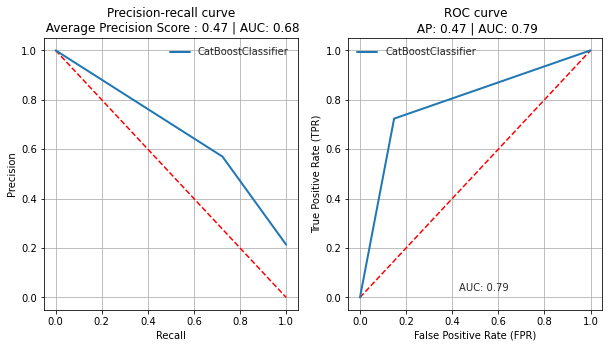

In [53]:
catboost_classifier(features_train, target_train, features_valid, target_valid, features_test, target_test)

Dengan Menggunakan Model Catboost model, kita mendapatkan F1-score 0.638

## Kesimpulan Akhir 


1. Dari informasi keseluruhan pada dataset, kita memiliki 10000 rows dengan 14 columns. dapat kita lihat terdapat 9% data yang hilang pada column "Tenure" dengan value yang hilang secara random / missing at random (MAR). lalu untuk menangani nilai yang hilang kita dapat drop value yang hilang atau mengisinya dengan median, serta kita akan mengubah tipe data dari float ke interger pada columns "Tenure", "Balance" dan "EstimatedSalary.
-----------
2. Utuk menangani nilai yang hilang pada column 'Tenure', pertama kita akan mendapatkan nilai yang unik berdasarkan column 'Surename', lalu kita akan memilih nilai acak dari list 'surename' lalu mendrop nilai yang hilang pada column tenure lalu mengisi nilai yang hilang dengan median dari columns tenure.
---------
3. Mempersiapkan variabel feature & target
Pada tahap ini kita akan menentukan kelas-kelas feature dan menggunakan one-hot encoding untuk tipedata kategorikal. one-hot encoding berguna untuk mengubah tipedata kategorikan menjadi numerik. langkah pertama kita harus membuat variabel dummy dan mengaplikasikannya ke one-hot encoding untuk variable feature kategorikal. sebelumnya kita akan menghapus variabel yang tidak penting untuk digunakan pada variabel feature seperti CustomerId, RowNumber dan Surname. lalu kita kan melatih model tanpa mempertimbangkan ketidakseimbangan pada data.
-----------
4.Meningkatkan Kualitas Model
Pada Tahap ini kita akan menggunakan dua pendekatan untuk memperbaiki ketidakseimbangan pada kelas yakni :

a. Class Weight Adjusment / Penyeimbangan Kelas
b. Upsampling

c. Memilih Parameter Terbaik
Pada tahap ini dengan meggunakan training set, kita akan memilih parameter terbaik dari beberapa model untuk dibandingkan, model mana yang paling terbaik untuk prediksi kita. lalu Dari investigasi kualitas model yang berbeda, kita dapat melihat bahwa pengklasifikasi CatBoost memberikan hasil terbaik untuk skor F1 0,60, akurasi 81.50% dan nilai AUC-ROC 77.56% dari empat model berbeda yang diselidiki. Model regresi logistik memiliki nilai terendah untuk skor F1 sebesar 0.304, akurasi sebesar 80.13%, dan AUC-ROC sebesar 58.28%. Model Catboost adalah model terbaik berdasarkan skor F1 saat memprediksi apakah nasabah akan meninggalkan bank.
